In [10]:
from utils import BaselineClassifier, evaluate, nn_accuracy, run
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from tqdm.notebook import tqdm
import os

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
results = []

In [17]:
ns = [5000]

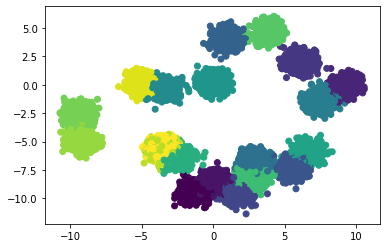

In [18]:
X_show, y_show = make_blobs(n_samples=10000, n_features=20, centers=20, cluster_std=0.5, shuffle=True, random_state=2)
plt.scatter(X_show[:, 0], X_show[:, 1], c=y_show)
#plt.savefig('figures/clustered_example.png')

In [ ]:
for n in tqdm(ns):
    for seed in tqdm(range(5)):
        results = []
        k = int(n/1000)
        result, _ = run(n_samples=n, n_features=20, n_clusters=20, cluster_std=0.5, k=k, n_test=100, random_seed=seed)
        results.append(result)
        hdr = False  if os.path.isfile('kmeans_clusters_rel_error.csv') else True
        pd.DataFrame(results).to_csv(f'kmeans_clusters_rel_error.csv', mode='a', header=hdr)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

0
Base Model: train: 1.0, valid: 1.0, error: 0.02209280004080148
0
Naive Bayes: train: 0.969575, valid: 0.9573, error: 0.022908027826439425
0
Decision Tree: train: 1.0, valid: 0.6923, error: 0.040251486411316185
0
Random Forest: train: 0.560975, valid: 0.532, error: 0.22159319475295053
0
Linear SVM: train: 0.992175, valid: 0.9859, error: 0.022266991004903168
0
RBF SVM: train: 0.974875, valid: 0.968, error: 0.024935368017376277
0
MLP: train: 0.929075, valid: 0.905, error: 0.024049312874850303
1
Base Model: train: 1.0, valid: 1.0, error: 0.026370990903791854
1
Naive Bayes: train: 0.968575, valid: 0.9601, error: 0.02501862734944021
1
Decision Tree: train: 1.0, valid: 0.7, error: 0.03408610753493579
1
Random Forest: train: 0.5425, valid: 0.5344, error: 0.05543962954756468
1
Linear SVM: train: 0.992125, valid: 0.9875, error: 0.023735444743349158


In [18]:
cluster_samples_clustered = pd.read_csv('./kmeans_clusters_rel_error.csv').drop('Unnamed: 0', axis=1)
cluster_samples_clustered

,seed,n_samples,n_features,n_clusters,k,std,Base Model_train,Base Model_valid,Base Model_mean_error,Base Model_test,...,Linear SVM_mean_error,Linear SVM_test,RBF SVM_train,RBF SVM_valid,RBF SVM_mean_error,RBF SVM_test,MLP_train,MLP_valid,MLP_mean_error,MLP_test
0,0,5000,20,20,5,0.5,1.0,1.0,1.898318,0.0000,...,1.898318,0.000,0.999500,0.999,1.898318,0.0,0.9995,0.999,1.898318,0.0
1,0,5000,20,20,5,0.5,1.0,1.0,1.898318,0.0000,...,1.898318,0.000,0.999500,0.999,1.898318,0.0,0.9995,0.999,1.898318,0.0
2,0,5000,20,20,5,0.5,1.0,1.0,1.898318,0.0000,...,1.898318,0.000,0.999500,0.999,1.898318,0.0,0.9995,0.999,1.898318,0.0
3,0,5000,20,20,5,0.5,1.0,1.0,1.898318,0.0000,...,1.898318,0.000,0.999500,0.999,1.898318,0.0,0.9995,0.999,1.898318,0.0
4,0,5000,20,20,5,0.5,1.0,1.0,1.898318,0.9995,...,0.999500,0.999,1.898318,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0,5000,20,20,5,0.5,1.0,1.0,1.898318,0.9995,...,0.999500,0.999,1.898318,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0,5000,20,20,5,0.5,1.0,1.0,1.898318,0.9995,...,0.999500,0.999,1.898318,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0,5000,20,20,5,0.5,1.0,1.0,1.898318,0.9995,...,0.999500,0.999,1.898318,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0,5000,20,20,5,0.5,1.0,1.0,1.898318,0.9995,...,0.999500,0.999,1.898318,NaN,NaN,NaN,NaN,NaN,NaN,NaN
